In [189]:
# importar librerias necesarias
import pandas as pd
import datetime
import numpy as np

In [190]:
#leer datos
datos_accidentes =  "2015_2019_siniestralidad_vial.xlsx"
# leer datos de accidentes hoja siniestros
accidentes_siniestros= pd.read_excel("2015_2019_siniestralidad_vial.xlsx", sheet_name="SINIESTROS")
accidentes_actor_vial = pd.read_excel("2015_2019_siniestralidad_vial.xlsx", sheet_name="ACTOR_VIAL")
accidentes_vehiculos = pd.read_excel("2015_2019_siniestralidad_vial.xlsx", sheet_name="VEHICULOS")
accidentes_hipotesis = pd.read_excel("2015_2019_siniestralidad_vial.xlsx", sheet_name="HIPOTESIS")

In [191]:
accidentes_siniestros.head()

,CODIGO_SINIESTRO,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE_CON,OBJETO_FIJO,DIRECCION,TOTAL_MUERTOS,TOTAL_HERIDOS,LOCALIDAD,DISENO_LUGAR
0,4401423,01/01/2015,09:45:00,Con Heridos,Choque,Vehiculo,NaN,CL 66A-KR 76 02,0,2,Engativá,Interseccion
1,4401425,01/01/2015,13:25:00,Solo Daños,Choque,Vehiculo,NaN,CL 143A-KR 142 02,0,0,Suba,Tramo de Via
2,4401430,01/01/2015,07:15:00,Con Heridos,Volcamiento,NaN,NaN,KR 19D-CL 62 S 02,0,1,Ciudad Bolívar,Tramo de Via
3,4401433,01/01/2015,20:30:00,Solo Daños,Choque,Vehiculo,NaN,AK 7-CL 43 33,0,0,Chapinero,Tramo de Via
4,4401437,01/01/2015,12:50:00,Solo Daños,Choque,Vehiculo,NaN,DG 77A-AK 18D 02,0,0,Ciudad Bolívar,Tramo de Via


In [192]:
accidentes_actor_vial.head()

,CODIGO_SINIESTRO,FECHA,CONDICION,ESTADO,EDAD,SEXO,VEHICULO
0,4401420,01/01/2015,CONDUCTOR,ILESO,20.0,MASCULINO,4401420-2
1,4401429,01/01/2015,PEATON,HERIDO,28.0,MASCULINO,NaN
2,4401442,01/01/2015,PASAJERO,HERIDO,22.0,MASCULINO,4401442-1
3,4401442,01/01/2015,PEATON,HERIDO,57.0,MASCULINO,NaN
4,4401423,01/01/2015,PEATON,HERIDO,19.0,FEMENINO,NaN


In [193]:
accidentes_vehiculos.head()

,CODIGO_SINIESTRO,FECHA,VEHICULO,CLASE,SERVICIO,ENFUGA
0,4401429,01/01/2015,4401429-1,Microbus,Publico,N
1,4401449,01/01/2015,4401449-1,Motocicleta,Particular,N
2,4401453,01/01/2015,4401453-1,Bus,Publico,N
3,4401453,01/01/2015,4401453-2,Automovil,Publico,N
4,4401447,01/01/2015,4401447-1,Automovil,Publico,N


In [194]:
accidentes_hipotesis.head()

,CODIGO_SINIESTRO,FECHA,CODIGO_CAUSA,DESCRIPCION,CODIGO_CAUSA2,DESCRIPCION2
0,4401449,01/01/2015,114,EMBRIAGUEZ APARENTE,NaN,NaN
1,4401447,01/01/2015,121,NO MANTENER DISTANCIA DE SEGURIDAD,NaN,NaN
2,4401438,01/01/2015,157,OTRA,NaN,NaN
3,4401429,01/01/2015,116,EXCESO DE VELOCIDAD,NaN,NaN
4,4401433,01/01/2015,121,NO MANTENER DISTANCIA DE SEGURIDAD,NaN,NaN


In [195]:
# verificar tipo de datos de cada columna del dataframe
accidentes_siniestros.dtypes

CODIGO_SINIESTRO     int64
FECHA               object
HORA                object
GRAVEDAD            object
CLASE               object
CHOQUE_CON          object
OBJETO_FIJO         object
DIRECCION           object
TOTAL_MUERTOS        int64
TOTAL_HERIDOS        int64
LOCALIDAD           object
DISENO_LUGAR        object
dtype: object

In [196]:
accidentes_actor_vial.dtypes

CODIGO_SINIESTRO      int64
FECHA                object
CONDICION            object
ESTADO               object
EDAD                float64
SEXO                 object
VEHICULO             object
dtype: object

In [197]:
accidentes_vehiculos.dtypes

CODIGO_SINIESTRO     int64
FECHA               object
VEHICULO            object
CLASE               object
SERVICIO            object
ENFUGA              object
dtype: object

In [198]:
accidentes_hipotesis

,CODIGO_SINIESTRO,FECHA,CODIGO_CAUSA,DESCRIPCION,CODIGO_CAUSA2,DESCRIPCION2
0,4401449,01/01/2015,114,EMBRIAGUEZ APARENTE,NaN,NaN
1,4401447,01/01/2015,121,NO MANTENER DISTANCIA DE SEGURIDAD,NaN,NaN
2,4401438,01/01/2015,157,OTRA,NaN,NaN
3,4401429,01/01/2015,116,EXCESO DE VELOCIDAD,NaN,NaN
4,4401433,01/01/2015,121,NO MANTENER DISTANCIA DE SEGURIDAD,NaN,NaN
...,...,...,...,...,...,...
206664,10507450,31/12/2019,121,NO MANTENER DISTANCIA DE SEGURIDAD,NaN,NaN
206665,10507440,31/12/2019,112,DESOBEDECER SEÑALES,NaN,NaN
206666,10507407,31/12/2019,157,OTRA,NaN,NaN
206667,10507407,31/12/2019,143,PONER EN MARCHA UN VEHICULO SIN PRECAUCIONES,NaN,NaN


In [199]:
import datetime
# convertir fecha de accidentes_siniestros de string a datetime
fecha_str = "12/01/1999"
datetime.datetime.strptime(fecha_str, "%d/%m/%Y").strftime("%Y-%m-%d")

'1999-01-12'

In [200]:
# se converte la fecha de 12/12/1999 a 1999/12/12
accidentes_siniestros["FECHA"] = list(map(lambda x: datetime.datetime.strptime(x,'%d/%m/%Y').strftime('%Y-%m-%d'), accidentes_siniestros['FECHA']))
# se convierte a datetime
accidentes_siniestros["FECHA"] =  pd.to_datetime(accidentes_siniestros["FECHA"], infer_datetime_format=True,)

In [201]:
accidentes_siniestros.head()

,CODIGO_SINIESTRO,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE_CON,OBJETO_FIJO,DIRECCION,TOTAL_MUERTOS,TOTAL_HERIDOS,LOCALIDAD,DISENO_LUGAR
0,4401423,2015-01-01,09:45:00,Con Heridos,Choque,Vehiculo,NaN,CL 66A-KR 76 02,0,2,Engativá,Interseccion
1,4401425,2015-01-01,13:25:00,Solo Daños,Choque,Vehiculo,NaN,CL 143A-KR 142 02,0,0,Suba,Tramo de Via
2,4401430,2015-01-01,07:15:00,Con Heridos,Volcamiento,NaN,NaN,KR 19D-CL 62 S 02,0,1,Ciudad Bolívar,Tramo de Via
3,4401433,2015-01-01,20:30:00,Solo Daños,Choque,Vehiculo,NaN,AK 7-CL 43 33,0,0,Chapinero,Tramo de Via
4,4401437,2015-01-01,12:50:00,Solo Daños,Choque,Vehiculo,NaN,DG 77A-AK 18D 02,0,0,Ciudad Bolívar,Tramo de Via


In [202]:
# se obtiene el dia de la semana mediante la fecha en datetime
accidentes_siniestros["DIA_SEMANA"] = accidentes_siniestros["FECHA"].dt.day_name()
# NOTA: Cambiar dias a Español

In [203]:
accidentes_siniestros.head()

,CODIGO_SINIESTRO,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE_CON,OBJETO_FIJO,DIRECCION,TOTAL_MUERTOS,TOTAL_HERIDOS,LOCALIDAD,DISENO_LUGAR,DIA_SEMANA
0,4401423,2015-01-01,09:45:00,Con Heridos,Choque,Vehiculo,NaN,CL 66A-KR 76 02,0,2,Engativá,Interseccion,Thursday
1,4401425,2015-01-01,13:25:00,Solo Daños,Choque,Vehiculo,NaN,CL 143A-KR 142 02,0,0,Suba,Tramo de Via,Thursday
2,4401430,2015-01-01,07:15:00,Con Heridos,Volcamiento,NaN,NaN,KR 19D-CL 62 S 02,0,1,Ciudad Bolívar,Tramo de Via,Thursday
3,4401433,2015-01-01,20:30:00,Solo Daños,Choque,Vehiculo,NaN,AK 7-CL 43 33,0,0,Chapinero,Tramo de Via,Thursday
4,4401437,2015-01-01,12:50:00,Solo Daños,Choque,Vehiculo,NaN,DG 77A-AK 18D 02,0,0,Ciudad Bolívar,Tramo de Via,Thursday


In [204]:
# crear columna del día del mes
accidentes_siniestros["DIA_MES"] = accidentes_siniestros["FECHA"].dt.month_name()
accidentes_siniestros.head()

,CODIGO_SINIESTRO,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE_CON,OBJETO_FIJO,DIRECCION,TOTAL_MUERTOS,TOTAL_HERIDOS,LOCALIDAD,DISENO_LUGAR,DIA_SEMANA,DIA_MES
0,4401423,2015-01-01,09:45:00,Con Heridos,Choque,Vehiculo,NaN,CL 66A-KR 76 02,0,2,Engativá,Interseccion,Thursday,January
1,4401425,2015-01-01,13:25:00,Solo Daños,Choque,Vehiculo,NaN,CL 143A-KR 142 02,0,0,Suba,Tramo de Via,Thursday,January
2,4401430,2015-01-01,07:15:00,Con Heridos,Volcamiento,NaN,NaN,KR 19D-CL 62 S 02,0,1,Ciudad Bolívar,Tramo de Via,Thursday,January
3,4401433,2015-01-01,20:30:00,Solo Daños,Choque,Vehiculo,NaN,AK 7-CL 43 33,0,0,Chapinero,Tramo de Via,Thursday,January
4,4401437,2015-01-01,12:50:00,Solo Daños,Choque,Vehiculo,NaN,DG 77A-AK 18D 02,0,0,Ciudad Bolívar,Tramo de Via,Thursday,January


Dia con mayor número de accidentes?

In [205]:
# función que recorre el dataframe y cuenta los accidentes que coincidan en un mes con el nombre de un dia a la semana
def Accidentes_por_mes(df, mes):
    lista_mes = []
    mon, tues, wed, thurs, fri, sat, sun = 0,0,0,0,0,0,0

    for idx, row in df.iterrows():
        if row["DIA_MES"] == mes and row["DIA_SEMANA"] == "Monday": mon +=1
        elif row["DIA_MES"] == mes and row["DIA_SEMANA"] == "Tuesday": tues +=1
        elif row["DIA_MES"] == mes and row["DIA_SEMANA"] == "Wednesday": wed +=1
        elif row["DIA_MES"] == mes and row["DIA_SEMANA"] == "Thursday": thurs +=1
        elif row["DIA_MES"] == mes and row["DIA_SEMANA"] == "Friday": fri +=1
        elif row["DIA_MES"] == mes and row["DIA_SEMANA"] == "Saturday": sat +=1
        elif row["DIA_MES"] == mes and row["DIA_SEMANA"] == "Sunday": sun +=1
        else: a=0

    lista_mes.append(mon)
    lista_mes.append(tues)
    lista_mes.append(wed)
    lista_mes.append(thurs)
    lista_mes.append(fri)
    lista_mes.append(sat)
    lista_mes.append(sun)

    total = mon+tues+wed+thurs+fri+sat+sun

    return(lista_mes)

In [206]:
january = Accidentes_por_mes(accidentes_siniestros, "January")
february = Accidentes_por_mes(accidentes_siniestros, "February")
march = Accidentes_por_mes(accidentes_siniestros, "March")
april = Accidentes_por_mes(accidentes_siniestros, "April")
may = Accidentes_por_mes(accidentes_siniestros, "May")
june = Accidentes_por_mes(accidentes_siniestros, "June")
july = Accidentes_por_mes(accidentes_siniestros, "July")
august = Accidentes_por_mes(accidentes_siniestros, "August")
september = Accidentes_por_mes(accidentes_siniestros, "September")
october = Accidentes_por_mes(accidentes_siniestros, "October")
november = Accidentes_por_mes(accidentes_siniestros, "November")
december = Accidentes_por_mes(accidentes_siniestros, "December")


In [207]:
columns = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
rows = ["'Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre'"]
data = np.array([january, february, march, april, may, june, july, august, september, october, november, december])
heatmap_df = pd.DataFrame(data=data, index=rows, columns=columns)

In [208]:
heatmap_df


,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
January,1616,1888,1787,1666,1838,1718,1104
February,2133,2052,2111,1827,2215,2125,1331
March,1857,2337,2203,2332,2580,2226,1428
April,2216,2112,2054,1993,2215,2174,1422
May,2095,2481,2379,2438,2498,2219,1476
June,1663,2141,2125,2256,2411,2202,1338
July,2089,2296,2115,2011,2309,2167,1480
August,2000,2352,2304,2379,2361,2181,1337
September,2025,2159,2155,2219,2498,2303,1536
October,2131,2449,2299,2233,2300,2318,1474


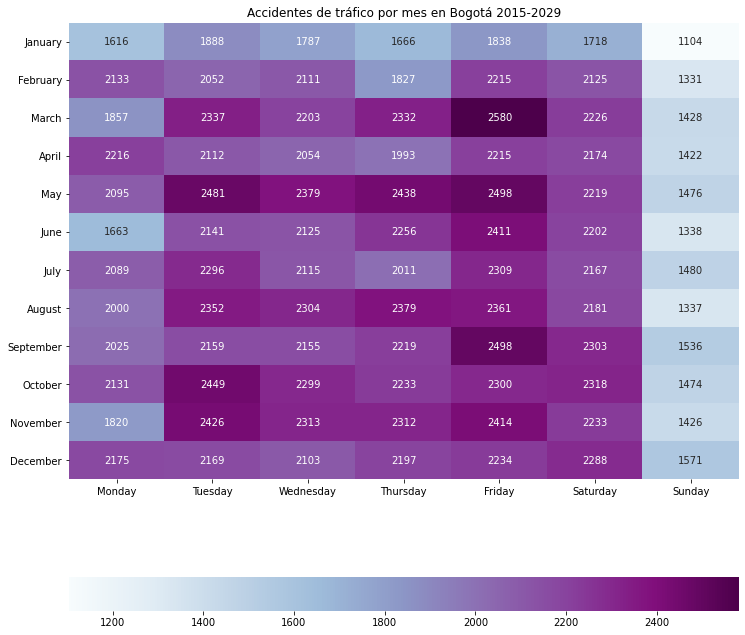

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
map1 = sns.heatmap(heatmap_df, annot=True, fmt="d", cmap='BuPu', cbar_kws={"orientation": "horizontal"} )
map1.set_title("Accidentes de tráfico por mes en Bogotá 2015-2029")
plt.savefig("Accidentes_por_mes.jpg")